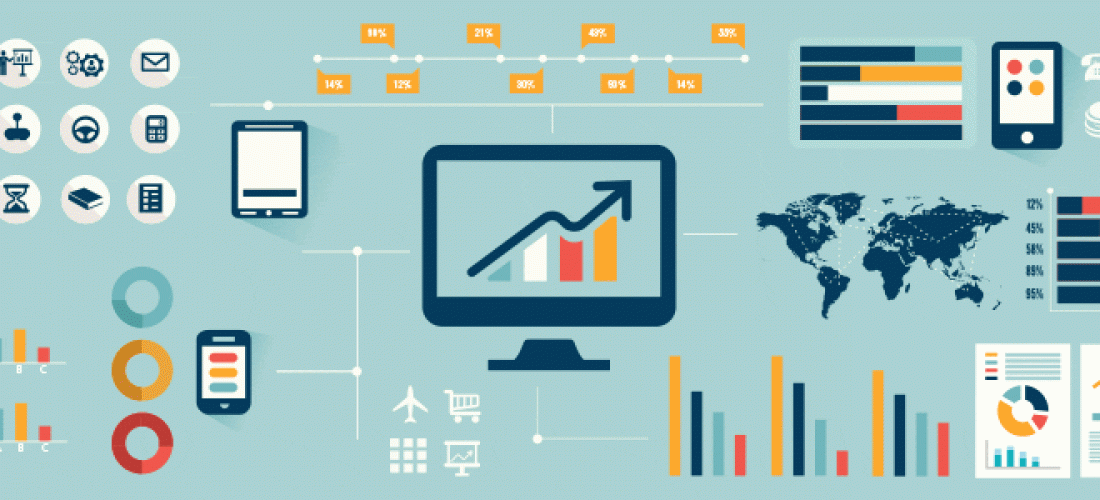

# Problem Overview

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description and more.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')

In [3]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

# Data Cleaning

This data contains -1 in multiple columns that indicates missing data. Replace it with np.nan

In [5]:
data = data.replace(-1, np.nan)
data = data.replace('-1', np.nan)
data = data.replace(-1.0, np.nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2252 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             1981 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2081 non-null   object 
 8   Size               2090 non-null   object 
 9   Founded            1593 non-null   float64
 10  Type of ownership  2090 non-null   object 
 11  Industry           1900 non-null   object 
 12  Sector             1900 non-null   object 
 13  Revenue            2090 non-null   object 
 14  Competitors        521 non-null    object 
 15  Easy Apply         80 non-null     object 
dtypes: float64(2), int64(1),

In [7]:
data['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$32K-$56K (Glassdoor est.)     4
$36K-$67K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

Salary estimate is a string with alpha-numeric and special symbols. Extract min and max salary values and put them in different columns

In [8]:
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: str(x))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x))
data['sal_est_min'] = data['Salary Estimate'].str[0].astype(np.float32)
data['sal_est_max'] = data['Salary Estimate'].str[1].astype(np.float32)
data.drop('Salary Estimate', axis=1, inplace=True)

In [9]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

Revenue is given in million dollars in some cases and billion dollars in other cases. Extract min and max revenues and put them in different columns

In [10]:
data['rev_scale'] = data['Revenue'].apply(lambda x: 1e6 if 'million' in str(x) else (1e9 if 'billion' in str(x) else (np.nan)))
data['rev_scale'] = data['rev_scale'].astype(np.float32)
data['Revenue'] = data['Revenue'].apply(lambda x: str(x))
data['Revenue'] = data['Revenue'].apply(lambda x: re.findall(r'\d+', x))
data['rev_min'] = data['Revenue'].str[0].astype(np.float32) * data['rev_scale']
data['rev_max'] = data['Revenue'].str[1].astype(np.float32) * data['rev_scale']
data.drop(['Revenue', 'rev_scale'], axis=1, inplace=True)

In [11]:
data['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

Extract employee size 

In [12]:
data['Size'] = data['Size'].apply(lambda x: str(x))
data['Size'] = data['Size'].apply(lambda x: re.findall(r'\d+', x))
data['min_emp_size'] = data['Size'].str[0].astype(np.float32)
data['max_emp_size'] = data['Size'].str[1].astype(np.float32)
data.drop('Size', axis=1, inplace=True)

In [13]:
data['Location'].value_counts()

New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
                    ... 
Azusa, CA              1
Sandy, UT              1
San Fernando, CA       1
National City, CA      1
Staten Island, NY      1
Name: Location, Length: 253, dtype: int64

Split Location into city and state

In [14]:
data['city'], data['state'] = data['Location'].str.split(',', 1).str
data.drop('Location', axis=1, inplace=True)

In [15]:
data['Headquarters'].value_counts()

New York, NY           206
San Francisco, CA       71
Chicago, IL             66
Woodridge, IL           58
Los Angeles, CA         49
                      ... 
Moore, OK                1
New Delhi, India         1
Allegan, MI              1
Garden City, NY          1
Deerfield Beach, FL      1
Name: Headquarters, Length: 482, dtype: int64

Split Headquarters into HQ city and HQ state

In [16]:
data['hq_city'], data['hq_state'] = data['Headquarters'].str.split(',',1).str
data.drop('Headquarters', axis=1, inplace=True)

In [17]:
data['company'] = data['Company Name'].apply(lambda x: str(x).split('\n')[0])
data.drop('Company Name', axis=1, inplace=True)

In [18]:
data['Job Title'].head()

0    Data Analyst, Center on Immigration and Justic...
1                                 Quality Data Analyst
2    Senior Data Analyst, Insights & Analytics Team...
3                                         Data Analyst
4                               Reporting Data Analyst
Name: Job Title, dtype: object

Extract Job title and department from Job title field

In [19]:
data['Job Title'], data['Department'] = data['Job Title'].str.split(',', 1).str
data[['Job Title', 'Department']].head()

,Job Title,Department
0,Data Analyst,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,NaN
2,Senior Data Analyst,Insights & Analytics Team [Customer Operations]
3,Data Analyst,NaN
4,Reporting Data Analyst,NaN


In [20]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
data.head()

,Job Title,Job Description,Rating,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,sal_est_min,...,rev_min,rev_max,min_emp_size,max_emp_size,city,state,hq_city,hq_state,company,Department
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,NaN,True,37.0,...,1.000000e+08,5.000000e+08,201.0,500.0,New York,NY,New York,NY,Vera Institute of Justice,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,NaN,NaN,37.0,...,2.000000e+09,5.000000e+09,10000.0,NaN,New York,NY,New York,NY,Visiting Nurse Service of New York,NaN
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,2003.0,Company - Private,Internet,Information Technology,GoDaddy,NaN,37.0,...,NaN,NaN,1001.0,5000.0,New York,NY,New York,NY,Squarespace,Insights & Analytics Team [Customer Operations]
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,NaN,NaN,37.0,...,5.000000e+07,1.000000e+08,201.0,500.0,New York,NY,McLean,VA,Celerity,NaN
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",DraftKings,True,37.0,...,1.000000e+08,5.000000e+08,501.0,1000.0,New York,NY,New York,NY,FanDuel,NaN


# Data Visualization

**Job Titles**

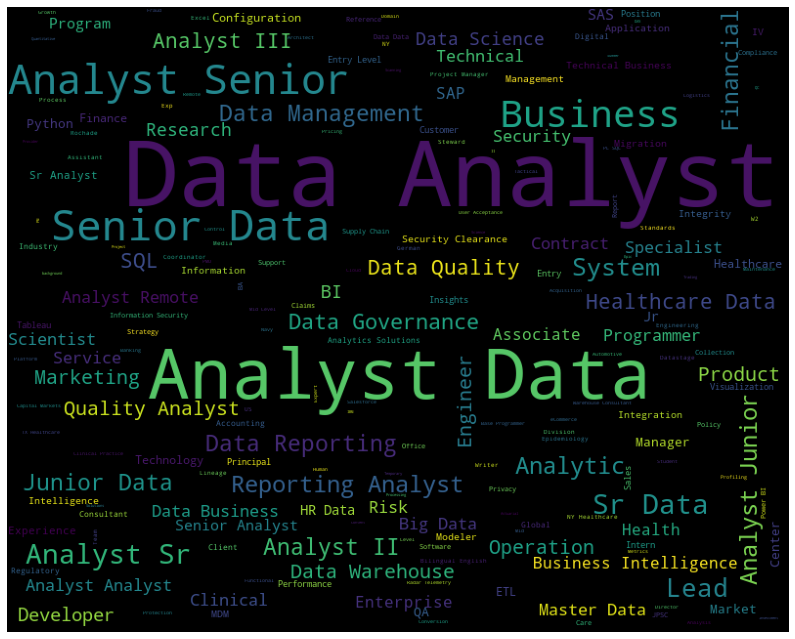

In [22]:
job_titles = list(data['Job Title'].values)
jt = ' '.join(job_titles)
wc = WordCloud(width = 800, height = 640, background_color='black').generate(jt)
plt.figure(figsize = (14, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

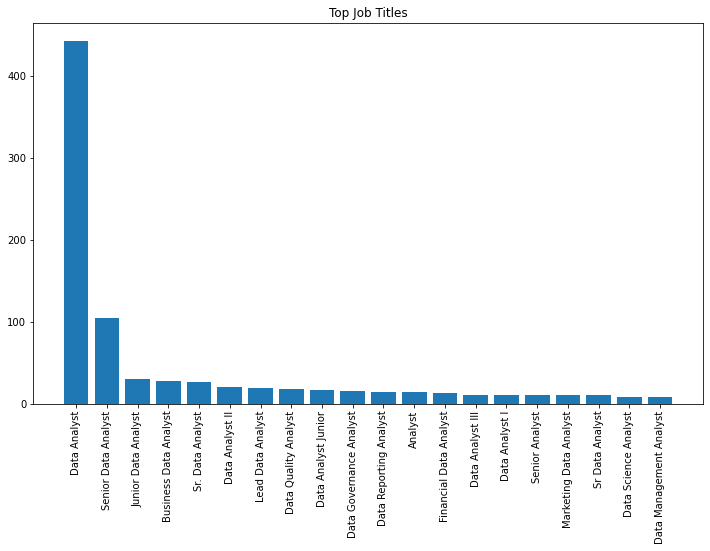

In [23]:
titles , values = zip(*Counter(job_titles).most_common(20))
plt.figure(figsize=(12,7))
plt.bar(titles, values)
plt.title('Top Job Titles')
plt.xticks(rotation=90)
plt.show()

**Founding Year. Considering it from 1930 until 2020**

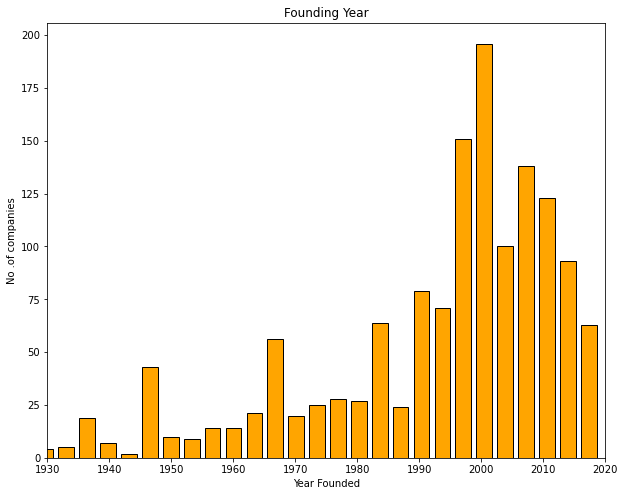

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(data['Founded'], bins=100, kde=False, color='orange', hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
plt.xlim([1930, 2020])
plt.title('Founding Year')
plt.xlabel('Year Founded')
plt.ylabel('No .of companies')
plt.show()

Many of these organizations were founded around 2000 

**Type of Ownership**

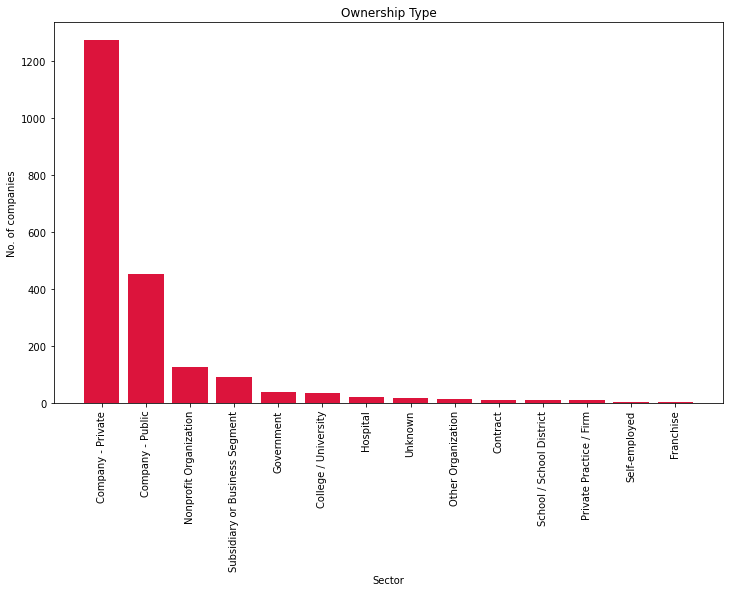

In [25]:
ownership= list(data['Type of ownership'].dropna().values)
dict1 = Counter(ownership)
dict1 = sorted(dict1.items(), key=lambda x: x[1], reverse=True)
ownership_type, counts = zip(*dict1)
plt.figure(figsize=(12,7))
plt.bar(ownership_type, counts, color='crimson')
plt.title('Ownership Type')
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('No. of companies')
plt.show()

A great majority of these organizations happen to be Private and Public companies

**Industry**

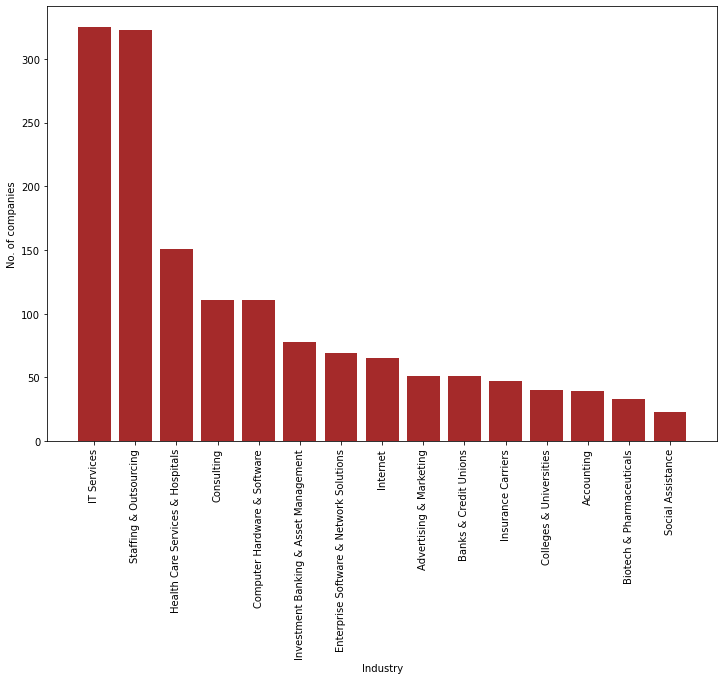

In [26]:
industry = data['Industry'].dropna().values
ind, vals = zip(*Counter(industry).most_common(15))
plt.figure(figsize=(12,8))
plt.bar(ind, vals, color='brown')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('No. of companies')
plt.show()

IT Services, Staffing & Outsourcing are the top two industries where there are far more Data Analyst roles than in other industries. 

**Sectors**

In [27]:
sector = data['Sector'].dropna()
fig = px.pie(sector, names='Sector', title='Sectors')
fig.show()

Three quarters of total job postings are from 4 sectors: Tech, Business services, Finance, Health care.

In [28]:
# Total no. of cities in data
len(data['city'].unique())

249

**Min and Max salaries of top 25 cities**

In [29]:
top_25 = data.groupby('city')[['sal_est_min', 'sal_est_max']].mean().sort_values(by = ['sal_est_max','sal_est_min'], ascending = False).head(25)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_25.index, y=top_25.sal_est_min, name='Min Salary'))
fig.add_trace(go.Bar(x=top_25.index, y=top_25.sal_est_max, name='Max Salary'))

fig.update_layout(title='Min and Max salaries in top 25 cities for Data Analyst roles in $\'000', barmode='stack')
fig.show()

In [30]:
roles_sal = data.groupby('Job Title')[['sal_est_min', 'sal_est_max']].mean().sort_values(['sal_est_max', 'sal_est_min'], ascending=False).head(20)

fig = go.Figure()

fig.add_trace(go.Bar(x=roles_sal.index, y=roles_sal.sal_est_min, name='Min Salary'))
fig.add_trace(go.Bar(x=roles_sal.index, y=roles_sal.sal_est_max, name='Max Salary'))

fig.update_layout(title='Min & Max salaries of 20 Job titles in $\'000', barmode='stack')
fig.show()

Percentage of job openings in data

In [31]:
data['Easy Apply'][data['Easy Apply'].notna()].shape[0]/data.shape[0] * 100

3.550821127385708

Only 3.55% of the data contains job openings

Job vacancies

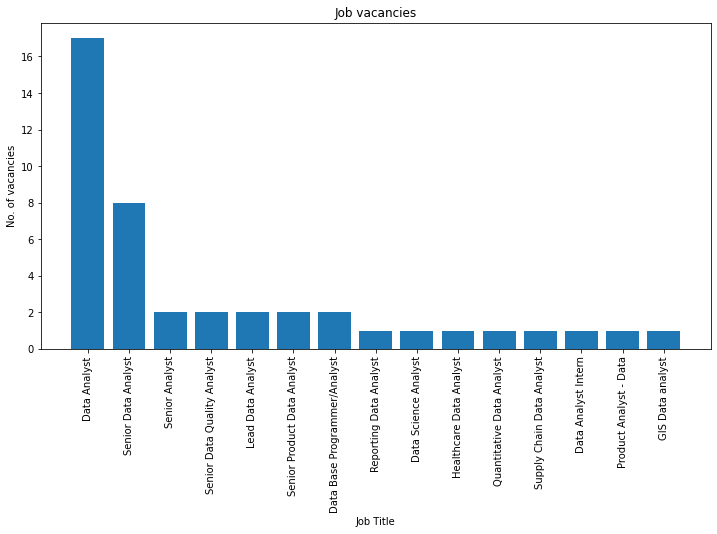

In [32]:
openings = data['Job Title'][data['Easy Apply'] == 'True']
openings = Counter(openings).most_common(15)
openings, counts = zip(*openings)
plt.figure(figsize=(12,6))
plt.bar(openings, counts)
plt.title('Job vacancies')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('No. of vacancies')
plt.show()

If you like my work, please upvote :)